# AMAT 502: Modern Computing for Mathematicians
## Lecture 10 - NumPy Arrays vs. Python Lists
### University at Albany SUNY

# Topics for Today

* NumPy Array Intro
* Comparison with Lists
* NumPy Array Operations and Syntax
* Vectorization
* Random Arrays

# Intro to NumPy

![numpy](numpy.png)

NumPy is a Python package that allows you to store and manipulate **homogeneous arrays of data**. These are like lists, but where every entry needs to be of the same data type, e.g. all entries are of type `float` or `str`. 

The definition of **homogeneous** means that, unlike Python lists, all elements of a NumPy array should be of same type.

Later, when we get into Pandas, we'll see how **dataframes** are well-built for **heterogeneous arrays of data**.

## Why NumPy?

We already have lists built in to Python, so why NumPy arrays?

- "Under the hood" NumPy has very fast encodings of array data structures, which makes them fast to search and manipulate---*much faster* then traditional search algorithms in a list, like bisection search.

- Because array-based data is so commonplace in computing, it makes sense to optimize your objects and methods to handle these. Indeed, one of ther reasons MATLAB, which is another popular programming language for scientific computing and modeling, is so popular is that it is optimized around arrays. **NumPy is Python's Matlab**

- NumPy is the basis for a [huge amount of other libraries, which you will want to use](https://numpy.org/). Packages such as...
    - `SciPy`
    - `random`
    - Pandas
    - scikit-learn (for machine learning!)
    - and many others are built "on top of" NumPy.


## Basic Syntax

In [2]:
import numpy as np # this is very important!
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
l = [[1,2,2],[4,-3,1],[12,2,10]]
B = np.array(l)
A+B
type(A)

numpy.ndarray

## Rows versus Columns

What (if any) difference does it make if an array is created with list $j$ rather than list $k$?

$j = [[1],[2],[3]]$

$k = [1,2,3]$

In [26]:
print(np.array([[1],[2],[3]]))
print(np.array([1,2,3]))

[[1]
 [2]
 [3]]
[1 2 3]


# Python List Operations

### Example Version 1
Suppose we have a list of distances traveled over a period of time and a list of those times for 10 cars. How would we calculate the speed for each car?

In [27]:
distances = [20, 15, 17, 4, 70, 42, 32, 37, 12, 10]
times = [1,3,6,2,5,13,8,7,9,.5]

In [28]:
speeds = []
for i in range(len(distances)):
    speeds.append(distances[i]/times[i])
speeds

[20.0,
 5.0,
 2.8333333333333335,
 2.0,
 14.0,
 3.230769230769231,
 4.0,
 5.285714285714286,
 1.3333333333333333,
 20.0]

## `zip` function
In Python you can take two iterable objects---like lists or tuples---and use the function `zip(i1,i2)` to return an iterable of tuples. 

This makes it easier to apply list comprehension.

### Example Version 2

In [38]:
pairs = zip(distances,times)
#type(pairs)
#print(list(pairs)) # uncomment to show what zip does
#note that list(pairs) is empty after it's used to compute speeds
speeds = [d/t for (d,t) in pairs]
print(speeds)
#print(list(pairs))

[20.0, 5.0, 2.8333333333333335, 2.0, 14.0, 3.230769230769231, 4.0, 5.285714285714286, 1.3333333333333333, 20.0]


## Working with "Higher Dimensional" Lists

Now what if we have higher dimensional arrays or lists? 

Write a loop (or use list comprehension if you can) to make a new list that is the product of each of the entries in the lists $a$ and $b$ defined below:

In [39]:
a = [[23,41],[-1,2]]
b = [[2,-4],[3,8]]

In [43]:
l3 = [[0,0],[0,0]]
for i in range(2):
    for j in range(2):
        l3[i][j] = a[i][j]*b[i][j]
print(l3)
C = np.array(l3)
print(C)
l3[0][1]

[[46, -164], [-3, 16]]
[[  46 -164]
 [  -3   16]]


-164

## Trying to Divide Lists
**Question:** Why do we get an *error* when we try to run:

In [46]:
print(distances)
print(times)
speeds = distances/times #this should generate an error

[20, 15, 17, 4, 70, 42, 32, 37, 12, 10]
[1, 3, 6, 2, 5, 13, 8, 7, 9, 0.5]


TypeError: unsupported operand type(s) for /: 'list' and 'list'

# NumPy to the Rescue!

Each of the above examples illustrate the rigidity of Python Lists.

Now let's replace these lists with their NumPy array analogues and see what happens when we do the same thing.

In [47]:
d = np.array(distances)
t = np.array(times)

In [50]:
speeds = d/t
speeds

array([20.        ,  5.        ,  2.83333333,  2.        , 14.        ,
        3.23076923,  4.        ,  5.28571429,  1.33333333, 20.        ])

In [51]:
a2 = np.array(a)
b2 = np.array(b)
a2*b2

array([[  46, -164],
       [  -3,   16]])

## NumPy Array Operations

<ol>
    
* Determining the size, shape, memory consumption, and data types of arrays
* Getting and setting the value of individual array elements
* Getting and setting smaller subarrays within a larger array
* Changing the shape of a given array
* Combining multiple arrays into one, and splitting one array into many

</ol>

In [52]:
arr = np.array([1,2,3,4,5]) 
arr1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [59]:
l2 = np.arange(1,10)
#l2 = np.arange(1,13)
# What does arange do if we needed this reshape function?
#l2
#l2.reshape(4,3)
l2.reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## NumPy Array Operations

* Notice that in order to define both the 1 x 5 array and the 3 x 3, we needed to define them using lists. In particular, we needed a list of lists to define the 3 x 3 array.

* You may also specify the datatype by setting the *dtype* argument. Some of the most commonly used numpy *dtypes* are: 'float', 'int', 'bool', 'str' and 'object'.

In [60]:
arr2 = np.array(arr1, dtype = 'str')
print(arr2)

[['1' '2' '3']
 ['4' '5' '6']
 ['7' '8' '9']]


## NumPy Array Operations

**Question:** How might we get a matrix of boolean values?

In [61]:
# Here is an example of how to incorporate boolean variables into an array

A = np.array([2,3,5,16,25,5,4,41,57])
B = A < 15
print(B)

# Notice that since we are defining a new array using a conditional statement, the new array 
#is made up of only True and False statements, i.e., the output for a conditional statement

[ True  True  True False False  True  True False False]


## Numpy Array Operations

**Question:** How might we get the values that satisfy that condition instead?

In [62]:
C = A[A < 15]
C

array([2, 3, 5, 5, 4])

### Differences between Python lists and Numpy arrays

<ol>

* Arrays support vectorized operations, while lists don’t.

* Once an array is created, you cannot change its size. You will have to create a new array or overwrite the existing one.

* Every array has one and only one data type. All items in it should be of that data type.

* An equivalent numpy array occupies much less space than a python list of lists. (WHY?)

</ol>

## NumPy Arrays

Here are some example computations to show you what we mean by "vectorized operations"

In [65]:
#Scalar Multiplication
print(A)
print(3*A)
print(B)
#Array multiplication is entrywise 
print(A*(3*B)) # Why is this what it is?
# well consider..
print(3*B)

[ 2  3  5 16 25  5  4 41 57]
[  6   9  15  48  75  15  12 123 171]
[ True  True  True False False  True  True False False]
[ 6  9 15  0  0 15 12  0  0]
[3 3 3 0 0 3 3 0 0]


## NumPy Arrays

We can also access rows and specific entries as we would for lists:

In [66]:
#Accessing rows 
print(A)
print(B)
A[2] + B[1] # Explain this output!

[ 2  3  5 16 25  5  4 41 57]
[ True  True  True False False  True  True False False]


6

In [67]:
#Accessing specific entries
A= A.reshape(3,3)
print(A)
B=B.reshape(3,3)
print(B)
A[0,0] + B[1,2] # Explain this output!

[[ 2  3  5]
 [16 25  5]
 [ 4 41 57]]
[[ True  True  True]
 [False False  True]
 [ True False False]]


3

## NumPy Arrays

We can run through 1-D arrays in the same way we do for lists:

In [69]:
# x[start:stop:step]
x = np.arange(2,29,3)
print(x)
x[1:7]

[ 2  5  8 11 14 17 20 23 26]


array([ 5,  8, 11, 14, 17, 20])

In [70]:
#1D Subarrays
print(x[4:])
print(x[:4])

[14 17 20 23 26]
[ 2  5  8 11]


## NumPy Arrays

Multidimensional arrays are similar...

In [73]:
#Multidimensional Arrays
#x[start:stop:step, start:stop:step, ...]
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A[::-1,::1])
print(A[::-1,::-1]) #compare with this!

[[7 8 9]
 [4 5 6]
 [1 2 3]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [74]:
#Make copies of arrays to manipulate one without affecting the other
A_copy = A.copy()
A_copy

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [75]:
#Make constant arrays

A_ones = np.ones((3,3))
print(A_ones)
A_zeros = np.zeros((3,3))
print(A_zeros)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


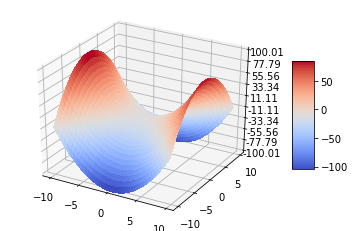

In [3]:
## 3d matplotlib x^2 - y^2 - 10
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline #Need to add this line starting Fa2021
from matplotlib import cm
import matplotlib.ticker as ticker
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)

Z = X**2 - Y**2 - 10

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-100.01, 100.01)
ax.zaxis.set_major_locator(ticker.LinearLocator(10))
ax.zaxis.set_major_formatter(ticker.FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## Numpy Arrays

* We can also make arrays of random numbers using Numpy's built in random number generator, *.random*

* Here we will use random.randomint() to create an array of random integers

In [93]:
# x1 = np.random.randint(random integers between 0 and 10, 1 x 6 array)
x1 = np.random.randint(10, size=6)  # One-dimensional array 
# x2 = np.random.randint(random integers between 0 and 10, 3 x 4 array)
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
# x3 = np.random.randint(random integer between 0 and 10, 3 x 4 x 5 array)
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

x2

array([[1, 4, 3, 1],
       [6, 1, 2, 5],
       [7, 5, 7, 6]])

In [3]:
import numpy as np
x1 = np.random.randint(10, size=6)
x1

array([7, 0, 3, 1, 6, 2])

## Random Arrays

* Random numbers between [0,1) of shape 2,2: **np.random.rand(2,2)**

* Normal distribution with mean=0 and variance=1 of shape 2,2: **np.random.randn(2,2)**

* Random integers between [0, 10) of shape 2,2: **np.random.randint(0, 10, size=[2,2])**

* One random number between [0,1): **np.random.random()**

## Random Arrays

* Random numbers between [0,1) of shape 2,2: **np.random.random(size=[2,2])**

* Pick 10 items from a given list, with equal probability: **np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10)**

* Pick 10 items from a given list with a predefined probability 'p':
**np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1])**

# Numpy Arrays

* Everytime we run the assignments of $x2, x2, x3$ above, the numbers within each array will change. If we want consistency throughout which random numbers are appearing for an array of a given size, we can use the command: **np.random.seed(0)**

* If we run the same code as above over and over, we will see that we will get the same arrays each time.

In [102]:
np.random.seed(0)  # seed for reproducibility

# x1 = np.random.randint(random integers between 0 and 10, 1 x 6 array)
x1 = np.random.randint(10, size=6)  # One-dimensional array 
# x2 = np.random.randint(random integers between 0 and 10, 3 x 4 array)
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
# x3 = np.random.randint(random integer between 0 and 10, 3 x 4 x 5 array)
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])